# Lasso Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import  metrics


Rozważmy następujący zbiór punktów:

In [10]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

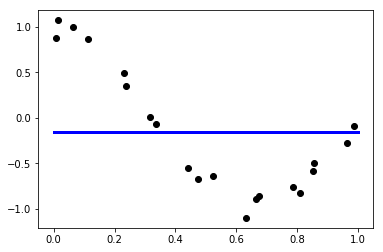

In [3]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


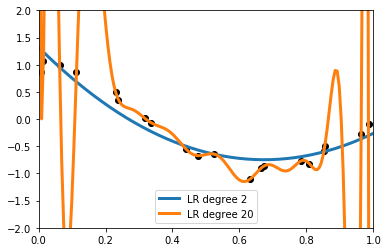

In [4]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (ElasticNet Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

LR degree 20
ElasticNet 1
ElasticNet 10000
ElasticNet 0.0001


C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0231087394978525, tolerance: 0.0005481465761561615
  model = cd_fast.enet_coordinate_descent(


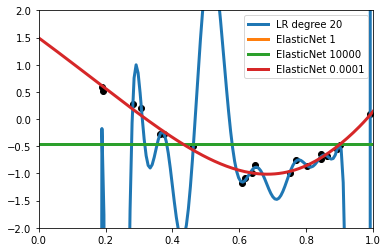

In [12]:
models = []
predicts = []
names=[]

models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))
models.append(('ElasticNet 1', make_pipeline(PolynomialFeatures(20), linear_model.ElasticNet(alpha=1)) ))
models.append(('ElasticNet 10000', make_pipeline(PolynomialFeatures(20), linear_model.ElasticNet(alpha=10000)) ))
models.append(('ElasticNet 0.0001', make_pipeline(PolynomialFeatures(20), linear_model.ElasticNet(alpha=0.0001)) ))


x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [11]:
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.ElasticNet(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [1,2,3,4,5],
                    'elasticnet__alpha' : [0.000001,0.00001,0.0001,0.001,0.01, 0.1, 1, 10, 100, 1000, 10000]},
                    refit=True)
grid.fit(x,y)
print(grid.best_params_)

C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0485918877773099, tolerance: 0.00017066989771946534
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06014255089835294, tolerance: 0.00048824320902943533
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07727316677633965, tolerance: 0.00040861359940230736
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

{'elasticnet__alpha': 0.0001, 'polynomialfeatures__degree': 3}


C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0344008637700486, tolerance: 0.0005481465761561615
  model = cd_fast.enet_coordinate_descent(


# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [4]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.ElasticNet(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [1,2,3,4,5],
                    'elasticnet__alpha' : [0.000001,0.00001,0.0001,0.001,0.01, 0.1, 1, 10, 100, 1000, 10000]},
                    refit=True)
grid.fit(X_train,y_train)
print(grid.best_params_)
print("r2 score: {}".format( metrics.r2_score(y_test, grid.predict(X_test)) ))

C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.500487787972556, tolerance: 0.25794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.54183438124015, tolerance: 0.2775139583333333
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.222995008381448, tolerance: 0.26182390625
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.917811639681907, tolerance: 0.2576445
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.2552074432456966, tolerance: 0.26783565625
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.510973740445372, tolerance: 0.25794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge

C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.489497509844937, tolerance: 0.25794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.607852372097637, tolerance: 0.2775139583333333
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.452497711286759, tolerance: 0.26182390625
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.12502103598849, tolerance: 0.26783565625
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.732873239765766, tolerance: 0.25794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.10380159589196, tolerance: 0.2775139583333333
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

{'elasticnet__alpha': 1e-06, 'polynomialfeatures__degree': 3}
r2 score: 0.9669611154060079


C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.668223863078765, tolerance: 0.25794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.67076220289097, tolerance: 0.2775139583333333
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.793633066125864, tolerance: 0.26182390625
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sou\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no